In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = [20, 10]
np.random.seed(sum(map(ord, "categorical")))

In [3]:
df1 = pd.read_csv(os.getcwd() +"/../data/30_05_2018code_analysis__summery_report.csv")

In [6]:
cols = df1.columns.tolist()

cols_ordered = []
cols_ordered.append('type')
cols_ordered.append('folder')
for col in cols:
    if col not in cols_ordered:
        cols_ordered.append(col)
df2 = df1[cols_ordered].dropna()
list(df2)

['type',
 'folder',
 'cbo_mode',
 'dit_quantile_min',
 'npa_quantile_ninety_five',
 'dit_quantile_max',
 'amloc_quantile_median',
 'sc_quantile_lower',
 'total_modules_with_defined_methods',
 'anpm_mean',
 'anpm_standard_deviation',
 'dit_skewness',
 'amloc_quantile_upper',
 'nom_quantile_lower',
 'cbo_quantile_min',
 'accm_quantile_lower',
 'nom_skewness',
 'anpm_variance',
 'npm_mode',
 'cbo_quantile_max',
 'acc_quantile_ninety_five',
 'loc_kurtosis',
 'mmloc_quantile_median',
 'noc_kurtosis',
 'dit_quantile_ninety_five',
 'accm_skewness',
 'noa_kurtosis',
 'rfc_skewness',
 'lcom4_quantile_upper',
 'npa_standard_deviation',
 'npm_quantile_lower',
 'npm_quantile_upper',
 'npm_quantile_ninety_five',
 'total_loc',
 'anpm_kurtosis',
 'change_cost',
 'cbo_skewness',
 'mmloc_quantile_upper',
 'mmloc_quantile_ninety_five',
 'noc_skewness',
 'rfc_quantile_max',
 'lcom4_quantile_min',
 'nom_quantile_max',
 'total_methods_per_abstract_class',
 'noc_mean',
 'rfc_sum',
 'sc_quantile_ninety_five'

In [7]:
df2 = df2[df2['folder']!='blaze']
y = pd.Categorical(df2.type)
cat = list(y.categories)


In [8]:
signs = ['x','o','+','^',',','*','+']
mkr_dict = {key:signs[i] for i,key in enumerate(cat)}

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

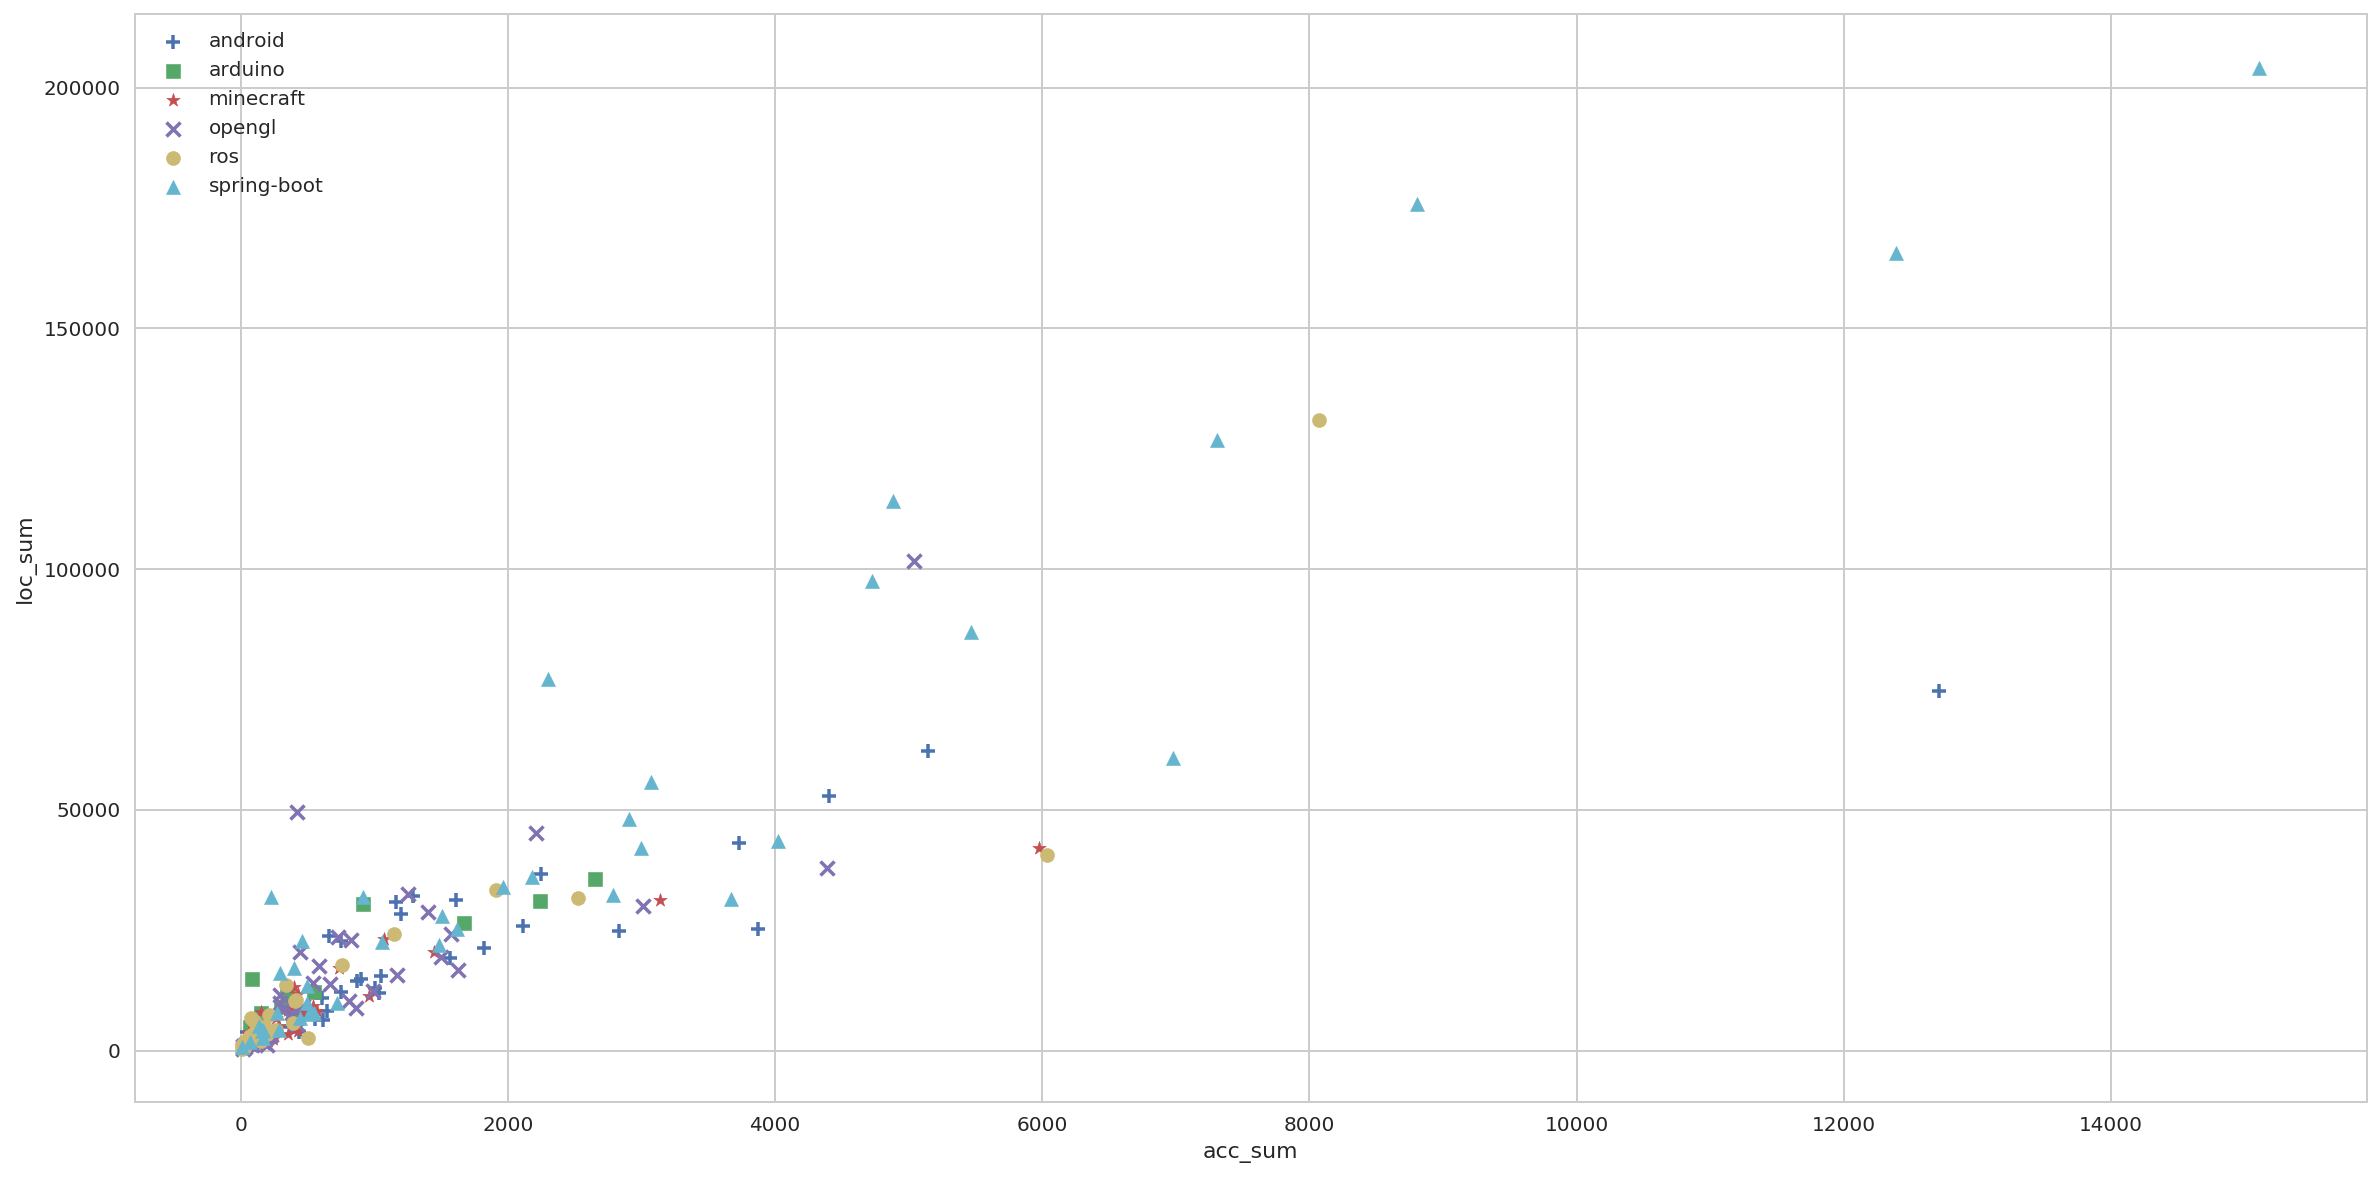

In [9]:
for kind in mkr_dict:
    d = df2[df2.type==kind]
    plt.scatter(d.acc_sum, d.loc_sum,marker = mkr_dict[kind])
    plt.xlabel('acc_sum')
    plt.ylabel('loc_sum')
    plt.legend(cat)
plt

In [10]:
ct = pd.crosstab(index=df2.type, columns = 'count')
ct / ct.sum()

col_0,count
type,
android,0.218605
arduino,0.139535
minecraft,0.167442
opengl,0.186047
ros,0.069767
spring-boot,0.218605


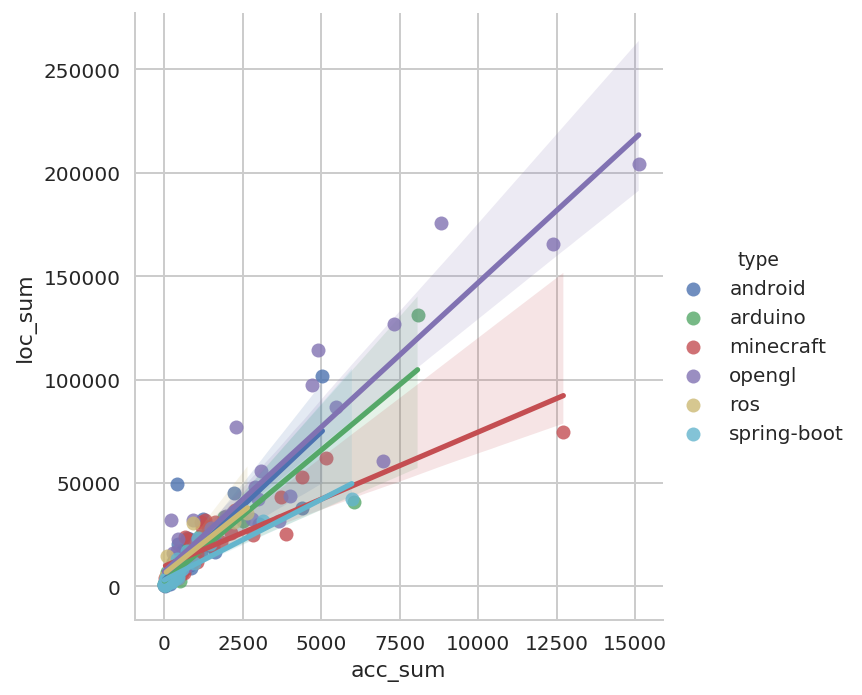

In [11]:
g = sns.lmplot(x="acc_sum", y="loc_sum", hue="type",
               truncate=True, size=5, data=df2)


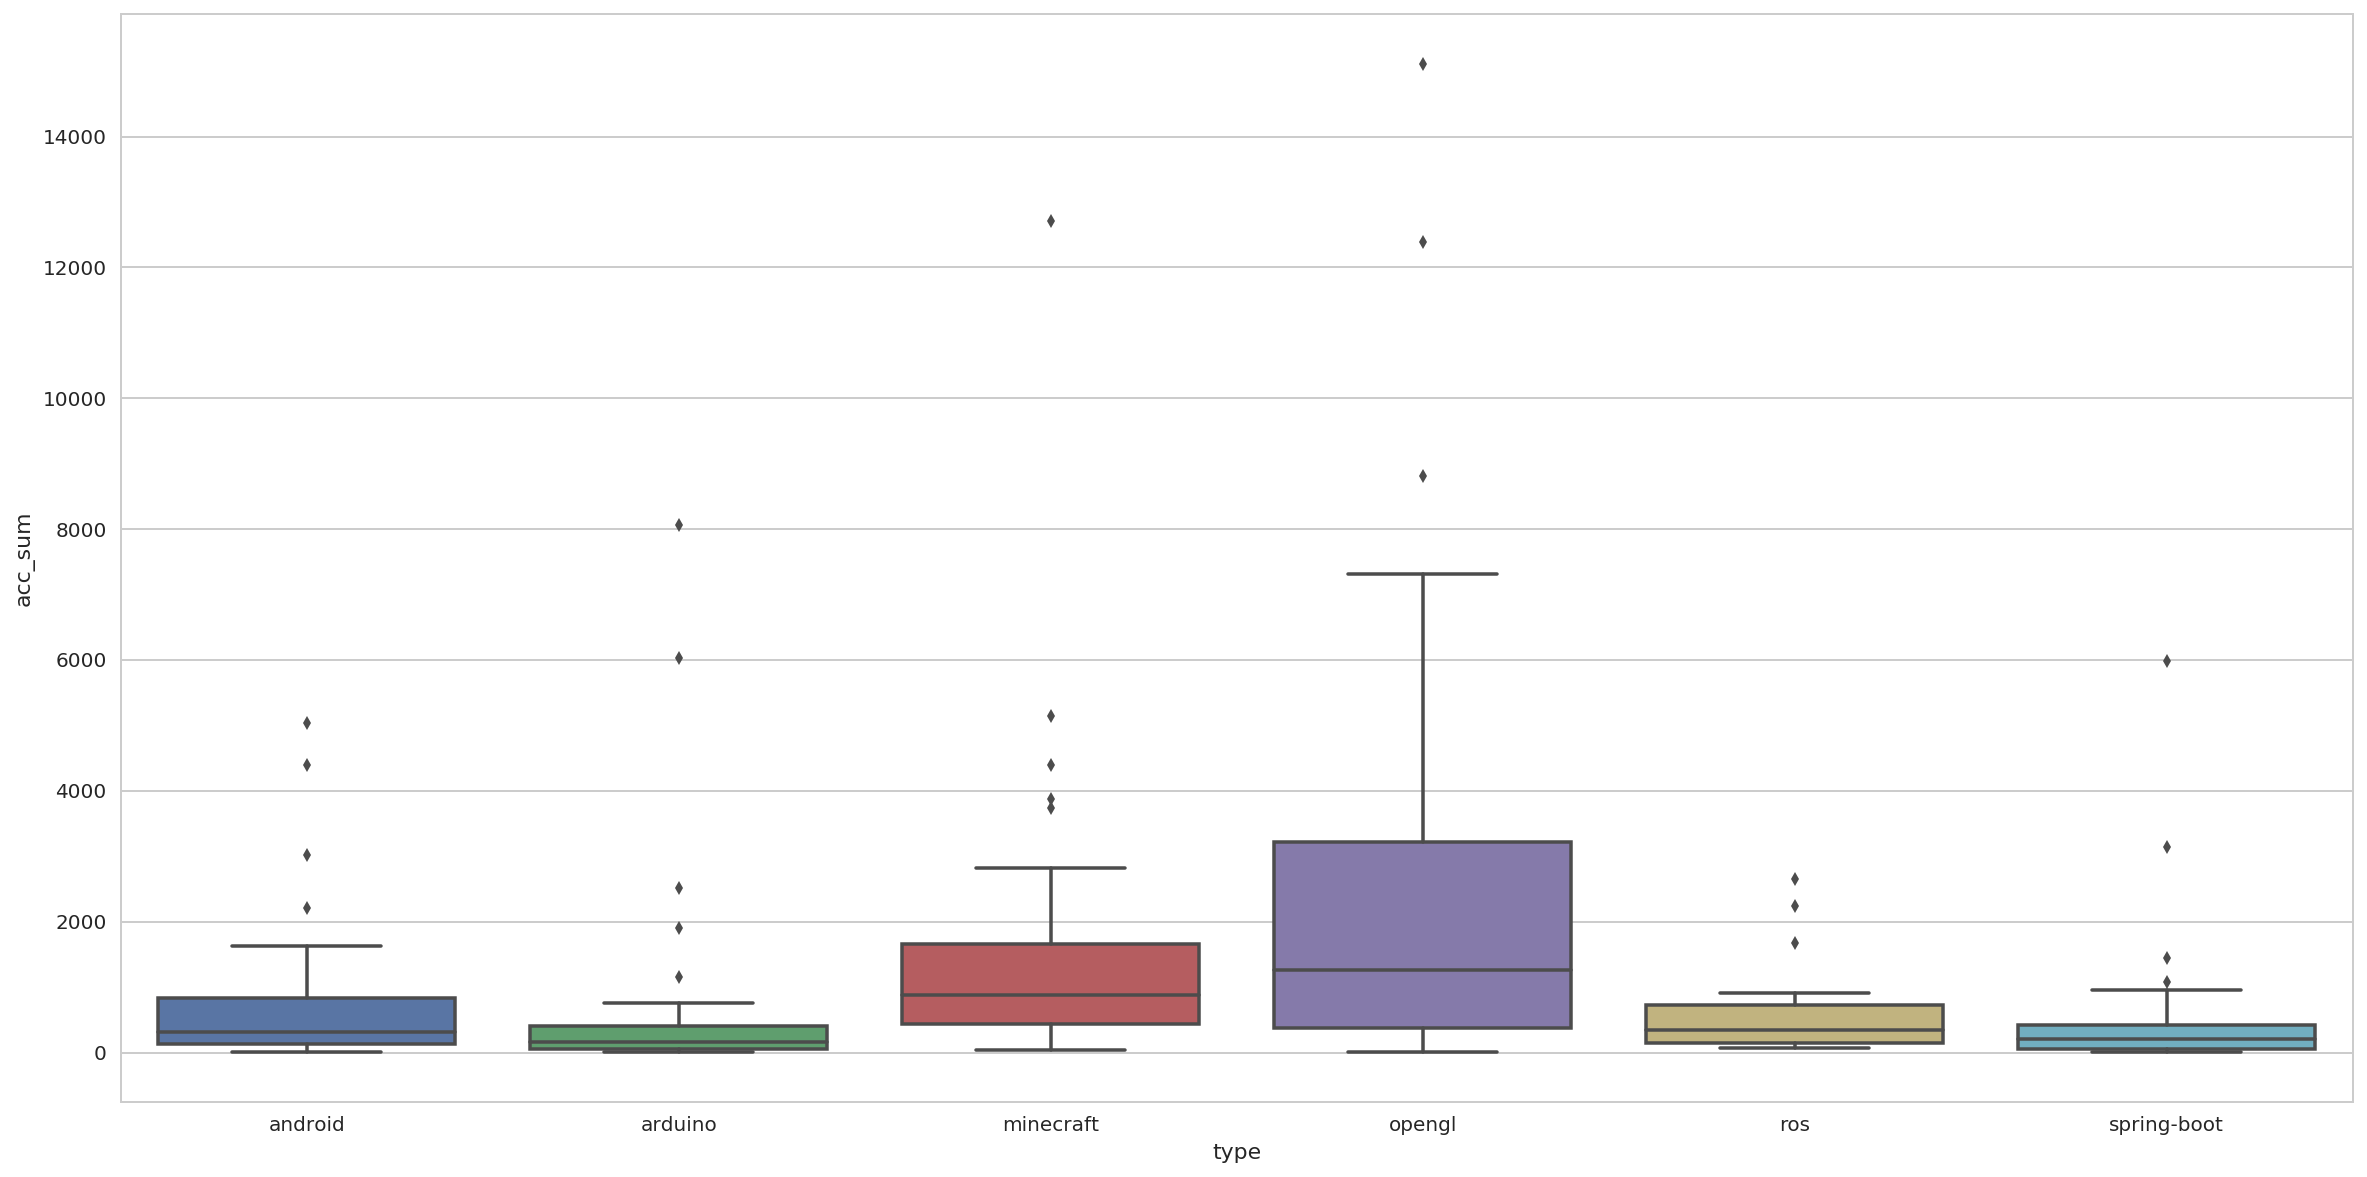

In [12]:
sns.boxplot(x='type',y='acc_sum',data=df2)

In [36]:
corr = df2.copy().corr().abs()
s = corr.unstack()
so = s.sort_values(kind="quicksort")
so = so.fillna(0)[(so>0)&(so<0.2)][:30]
so

accm_quantile_max           dit_variance                  0.000017
dit_variance                accm_quantile_max             0.000017
noc_sum                     anpm_mean                     0.000033
anpm_mean                   noc_sum                       0.000033
lcom4_quantile_upper        acc_mode                      0.000035
acc_mode                    lcom4_quantile_upper          0.000035
npa_quantile_median         sc_mode                       0.000044
sc_mode                     npa_quantile_median           0.000044
noc_mean                    npa_kurtosis                  0.000055
npa_kurtosis                noc_mean                      0.000055
noa_variance                amloc_kurtosis                0.000078
amloc_kurtosis              noa_variance                  0.000078
cbo_skewness                lcom4_quantile_ninety_five    0.000086
lcom4_quantile_ninety_five  cbo_skewness                  0.000086
noc_variance                amloc_variance                0.00

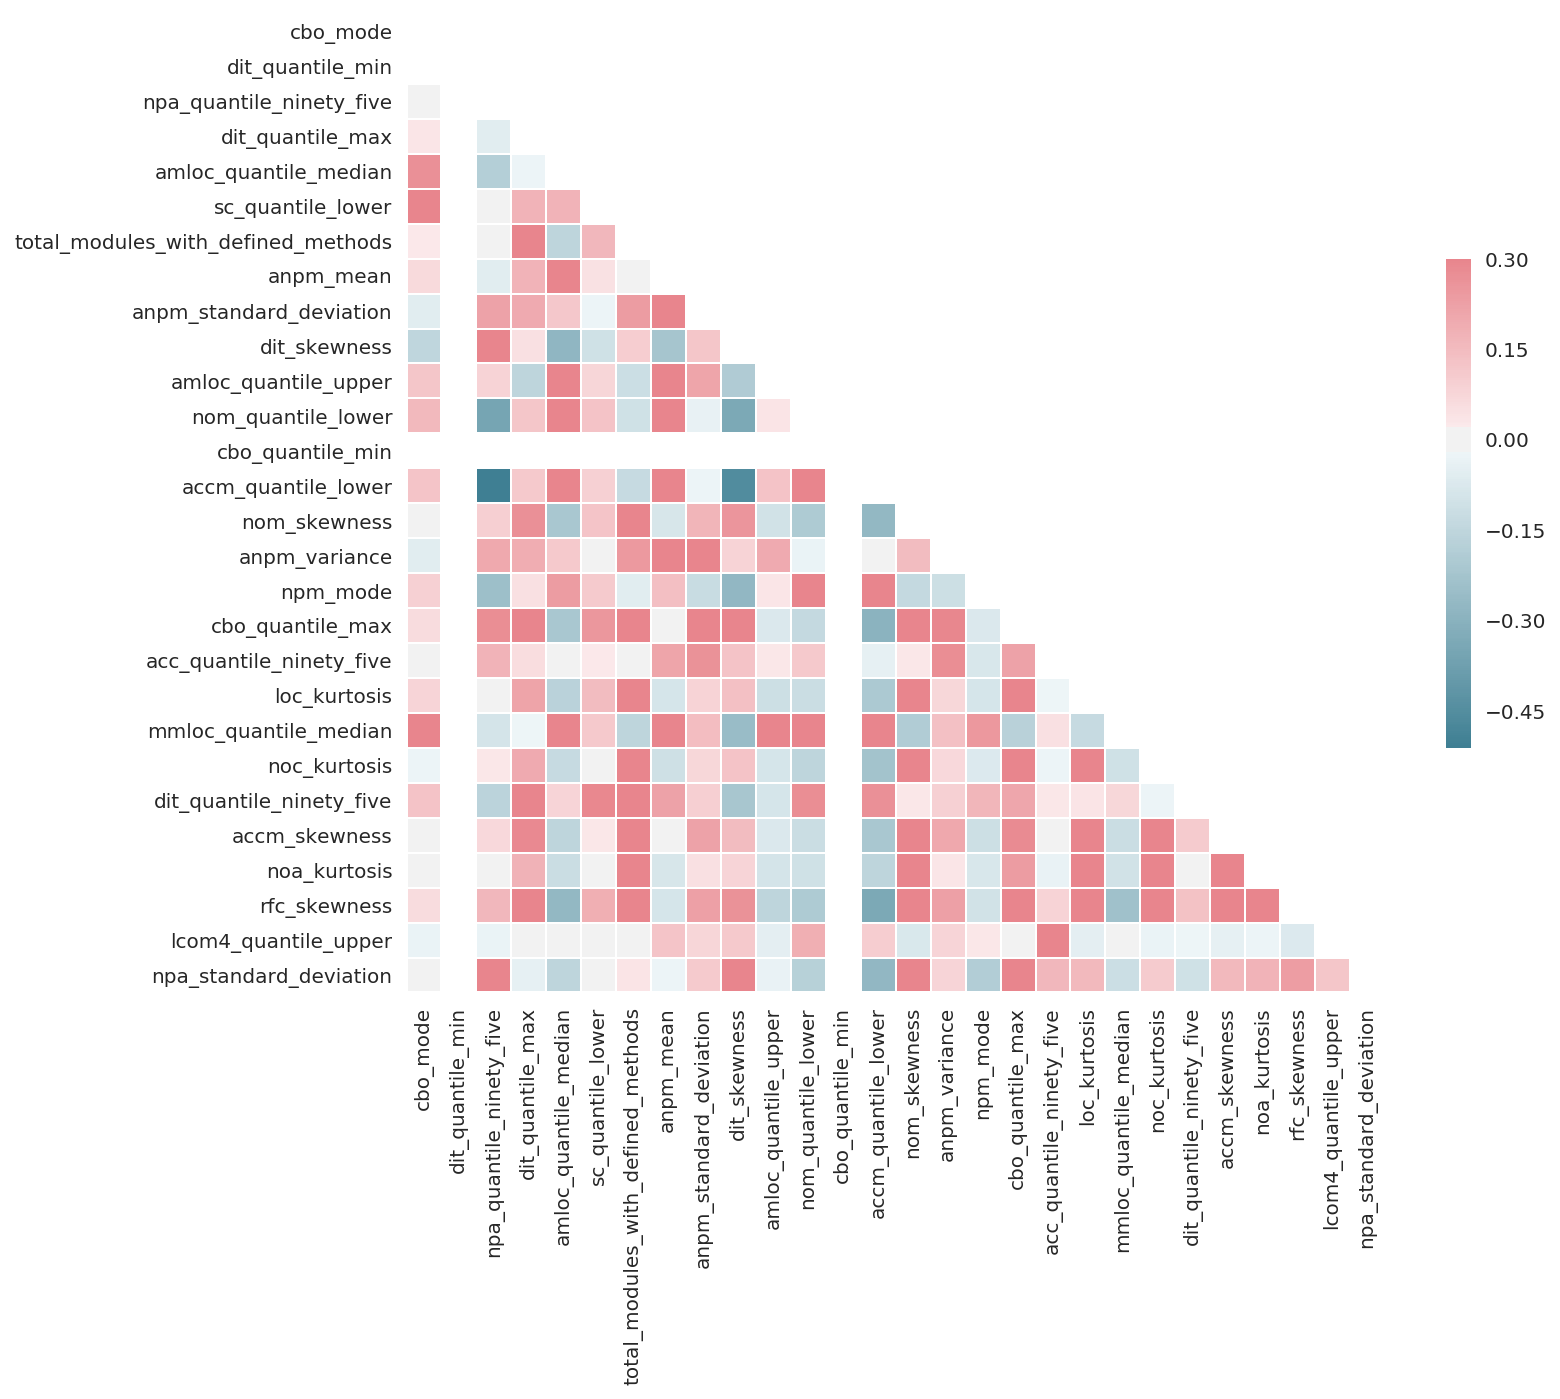

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})